In [ ]:
# 사용 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

In [ ]:
df1 = pd.read_csv("/content/patent_re_re.csv")
df2 = pd.read_csv("/content/patent_Enterprise_.csv")

In [ ]:
df3 = pd.read_csv("/content/patent_Enterprise_BranchCut.csv")

In [ ]:
pd.set_option('display.max_rows', 10000)
df1['출원인'].value_counts()

Uber Technologies                                                                                                                          51
Baidu                                                                                                                                      50
TOYOTA                                                                                                                                     49
GM Global Technology Operations LLC                                                                                                        39
Hyundai Motor                                                                                                                              34
State Farm Mutual Automobile Insurance Company                                                                                             34
Stradvision                                                                                                                                33
TuSimp

In [ ]:
df2['출원일자숫자'].describe()

count       35.000000
mean     43949.057143
std        191.285887
min      43548.000000
25%      43826.000000
50%      43921.000000
75%      44036.500000
max      44514.000000
Name: 출원일자숫자, dtype: float64

In [ ]:
df2['평균 인용수'].describe()

count     35.000000
mean      17.216859
std       64.344110
min        0.000000
25%        2.315476
50%        3.555556
75%        8.685185
max      384.147059
Name: 평균 인용수, dtype: float64

In [ ]:
df2.loc[df2['평균 인용수'] >= 300, '평균 인용수'] = 50

In [ ]:
df2['평균 인용수']

0      8.862745
1      4.180000
2      2.918367
3      3.358974
4      0.823529
5     50.000000
6     13.606061
7      8.703704
8     30.958333
9      2.380952
10     3.625000
11     3.266667
12     9.266667
13    38.266667
14     2.214286
15     2.909091
16     6.181818
17    14.727273
18     3.400000
19     2.444444
20     3.555556
21     3.142857
22     8.666667
23     9.666667
24     2.166667
25     8.000000
26     7.400000
27     0.000000
28     0.000000
29     5.500000
30     0.000000
31     4.000000
32     2.250000
33     2.000000
34     0.000000
Name: 평균 인용수, dtype: float64

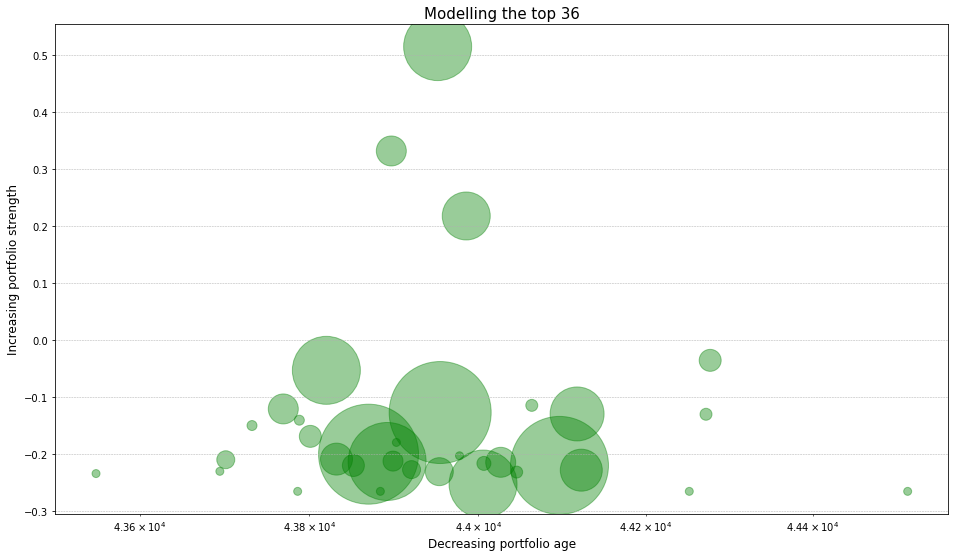

In [ ]:
plt.figure(figsize=(16,9))

plt.scatter(df2['출원일자숫자'], # x축
            (df2['평균 인용수']-17)/64, # y축
            s = df2['출원수']*df2['출원수']*4, # 사이즈
            c = 'green', # 색깔(고정)
            alpha = 0.4) # 투명도

plt.xscale('log')
plt.xlabel('Decreasing portfolio age', size = 12)
plt.ylabel('Increasing portfolio strength', size = 12)
plt.title('Modelling the top 36', size = 15)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    x=df2["출원일자숫자"], 
    y=df2["평균 인용수"],
    size=df2["출원수"],  
    hover_name=df2["기업명"],
    color=df2["기업명"],
    log_x=True, 
    title='Modelling the top 36',
    size_max=60,
    height=650)

fig.update_layout(
    title='Modelling the top 36',
    xaxis=dict(
        title='Decreasing portfolio age',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Increasing portfolio strength',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

In [ ]:
df_hyundai = pd.DataFrame({'기업명':["Hyundai Motor&Motional AD"], '출원수': [45], '평균출원일자':['2020-08-29'], '평균 인용수': [4.2222222], '출원일자숫자':[44072]})

In [ ]:
df2 = df2.append(df_hyundai, ignore_index = True)

In [ ]:
import plotly.express as px

fig = px.scatter(
    x=df2["출원일자숫자"], 
    y=df2["평균 인용수"],
    size=df2["출원수"],  
    hover_name=df2["기업명"],
    color=df2["기업명"],
    log_x=True, 
    title='Modelling the top 36',
    size_max=60,
    height=650)

fig.update_layout(
    title='Modelling the top 36',
    xaxis=dict(
        title='Decreasing portfolio age',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Increasing portfolio strength',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    x=df3["출원일자숫자"], 
    y=df3["평균 인용수"],
    size=df3["출원수"],  
    hover_name=df3["기업명"],
    color=df3["산업분류"],
    log_x=True, 
    title='Modelling the representative Company',
    size_max=60,
    height=650)

fig.update_layout(
    title='Modelling the representative Company',
    xaxis=dict(
        title='Decreasing portfolio age',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Increasing portfolio strength',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='Baidu')|(df1['출원인']=='Apollo Intelligent')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
#  위의 리스트 개별 요소를 한개씩 분리해냄, 이 과정에서 :4 부분으로 ipc를 4글자로 자름
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Baidu = pd.DataFrame(edge_list)
df_ipc_enterprise_Baidu

,0,1
0,0,B60W
1,0,H04N
2,0,G06K
3,0,G06N
4,0,G05D
...,...,...
240,55,G06T
241,55,G06T
242,55,G01S
243,55,G01S


In [ ]:
df_ipc_enterprise_Baidu[1].value_counts()

B60W    57
G05D    37
G06K    30
G06N    21
G01S    16
G06T    12
G08G     9
H04L     8
H04R     7
B60Q     7
G10L     6
G07C     6
A61B     6
G06V     5
G01C     5
H04W     4
G06F     3
B60R     3
H04N     1
H04S     1
H04B     1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='Uber Technologies')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Uber = pd.DataFrame(edge_list)
df_ipc_enterprise_Uber[1].value_counts()

G08G    73
G05D    52
B60W    41
G01C    36
G06N    25
G06T    15
G01S    14
G06Q    13
B60R    13
H04W     7
G06K     5
G05B     2
G06V     2
B60T     1
G07C     1
E05F     1
H04L     1
B60N     1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='TOYOTA')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Toyota = pd.DataFrame(edge_list)
df_ipc_enterprise_Toyota[1].value_counts()

B60W    74
G05D    35
G08G    18
G06Q    12
G06N     8
G06K     8
G07C     6
G01C     6
G05B     4
H04W     4
G06F     3
B60R     3
B60H     2
B60J     2
A61L     2
B60Q     2
B60N     2
E05F     1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='GM Global Technology Operations LLC')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_GM = pd.DataFrame(edge_list)
df_ipc_enterprise_GM[1].value_counts()

G05D    53
G06K    23
B60W    22
G01C    13
G06N     9
G07C     6
B60K     6
G05B     5
G01S     4
B60Q     2
A61G     2
G06T     2
G06Q     1
G08G     1
B60P     1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='Hyundai Motor')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Hyundai = pd.DataFrame(edge_list)
df_ipc_enterprise_Hyundai[1].value_counts()

B60W    38
G05D    31
G06K    21
G06N    16
G06V     5
G06Q     5
G01C     4
B62D     3
G10L     2
H04R     2
B60R     2
G07C     2
H04W     2
G05B     2
G06F     1
G01S     1
G08G     1
G06T     1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='State Farm Mutual Automobile Insurance Company')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_StateFarm = pd.DataFrame(edge_list)
df_ipc_enterprise_StateFarm[1].value_counts()

G06Q    61
B60W    45
G08G    32
G07C    28
G05D    17
H04W    16
B60R    16
G08B    13
G06K     9
G01S     9
H04L     8
G06F     7
G05B     7
G01C     5
B60Q     5
G06N     4
G06T     4
B60L     2
G01W     2
B60P     1
G01B     1
G06V     1
H04N     1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='Micron Technology, Inc.')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Micron = pd.DataFrame(edge_list)
df_ipc_enterprise_Micron[1].value_counts()

B60R    21
G06F    14
G07C    13
B60W    12
G06N    11
G05D    10
G06T     9
H04N     9
G06K     8
G03B     6
G01S     6
G02B     5
G01C     3
G06V     3
H04W     2
G06Q     1
B60L     1
G05B     1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='Waymo')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Waymo = pd.DataFrame(edge_list)
df_ipc_enterprise_Waymo[1].value_counts()

G05D    19
G06K    14
B60W    11
G08G    11
G01S     8
B60Q     8
G06F     4
G06N     2
G06T     2
A61B     2
G06V     1
G01C     1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='Samsung Electronics')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Samsung = pd.DataFrame(edge_list)
df_ipc_enterprise_Samsung[1].value_counts()

G05D    18
B60W    12
G11C    11
G01C     8
G06T     8
G06K     7
G06N     6
H04N     6
G06V     4
G01S     2
G06F     2
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='Aurora')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Aurora = pd.DataFrame(edge_list)
df_ipc_enterprise_Aurora[1].value_counts()

G05D    22
G06N    13
B60W    11
G06K    10
G01S     5
G05B     2
G06V     2
G07C     1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='Motional AD')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Motional = pd.DataFrame(edge_list)
df_ipc_enterprise_Motional[1].value_counts()

B60W    22
G05D    11
G06N     9
G06V     6
G01C     6
G06K     5
G07C     4
G08G     2
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='Tesla')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Tesla = pd.DataFrame(edge_list)
df_ipc_enterprise_Tesla[1].value_counts()

G05D    7
G06N    6
G06K    6
B60W    4
G06T    3
H04L    3
B60Q    1
G06F    1
B60R    1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='VOLKSWAGEN AG')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Volkswagen = pd.DataFrame(edge_list)
df_ipc_enterprise_Volkswagen[1].value_counts()

G05D    6
B60W    6
G01C    5
G06N    4
G06T    2
G06Q    1
B62D    1
B60K    1
G01S    1
H04L    1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='FORD GLOBAL TECHNOLOGIES')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Ford = pd.DataFrame(edge_list)
df_ipc_enterprise_Ford[1].value_counts()

G06K    6
B60W    4
H04W    2
G06T    2
G06F    1
G06N    1
B60K    1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='HONDA MOTOR')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Honda = pd.DataFrame(edge_list)
df_ipc_enterprise_Honda[1].value_counts()

G06T    4
B60W    3
G06K    3
G06N    2
G01C    1
G06F    1
G05B    1
G05D    1
H04N    1
Name: 1, dtype: int64

In [ ]:
df_ipc_enterprise = df1[(df1['출원인']=='Huawei Technologies')]
df_ipc_enterprise = df_ipc_enterprise[['IPC분류']]

In [ ]:
df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()

In [ ]:
edge_list = []
for data in zip(range(df_ipc_enterprise.shape[0]),df_ipc_enterprise["IPC분류"].map(lambda x : x.split(",")).tolist()):
  for value in data[1]:
    edge_list.append([data[0],value.strip()[:4]])

In [ ]:
df_ipc_enterprise_Huawei = pd.DataFrame(edge_list)
df_ipc_enterprise_Huawei[1].value_counts()

B60W    6
G06N    2
G06V    2
H04W    1
B60S    1
G01C    1
Name: 1, dtype: int64

In [ ]:
import plotly.graph_objects as go

labels = ['US','KR','JP','CN','EU','IL','IN','CA','TW']
values = [414, 94, 71, 69, 48, 10, 8, 2, 1]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=["2015", "2016", "2017",
      "2018", "2019", "2020",
      "2021", "2022"],
    y=[29,29,134,220,303,247,134,44],
))

fig.update_layout(
    title='년도별 출원 추이 그래프',
    xaxis=dict(
        title='출원년도',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='특허출원건수',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    hovermode="x unified"
)

#fig.update_layout(hovermode="x unified")
fig.show()